In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import json
import librosa
from scipy.spatial.distance import cosine
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Loading the dataset containing all song features which were extracted in part 1
df = pd.read_csv('song_features.csv')

# Converting the segment pitches column from JSON string to numpy array and computing their mean.
df['segments_pitches'] = df['segments_pitches'].apply(lambda x: np.mean(np.array(json.loads(x)), axis=0))

# Normalize the segment pitches by subtracting the mean and dividing by the standatd deviation
df['segments_pitches'] = df['segments_pitches'].apply(lambda x: (x - np.mean(x)) / np.std(x))

print("Data loaded from song_features.csv")

Data loaded from song_features.csv


In [3]:
df['segments_pitches'][8773]

array([-0.22250545,  1.46649833, -0.92940754,  2.04019486, -0.79109269,
       -0.62677638,  0.12588831, -1.1369253 , -0.17878397, -1.10766065,
        0.31827321,  1.04229727])

In [4]:
# Path for the MP3 file.
new_song_path = '/Users/vivekrambha/Documents/MSC project/01-akon-right_now_(na_na_na).mp3'


#new_song_path = '/Users/vivekrambha/Documents/MSC project/english/mettalica/Metallica - Fuel.mp3'
# new_song_path = '/Users/vivekrambha/Documents/MSC project/artist - Track 01.mp3'
# new_song_path = '/Users/vivekrambha/Documents/MSC project/Ke$ha - Your Love Is My Drug.mp3'
#new_song_path = '/Users/vivekrambha/Documents/MSC project/english/pitbull/Priyanka Chopra - Exotic (Feat. Pitbull).mp3'

#new_song_path = '/Users/vivekrambha/Documents/QMUL Slides and Notes/Music recommendation system/english/Back street boys Greatest hits    (Chapter One)/02.Eevery body.mp3'

#new_song_path = '/Users/vivekrambha/Documents/QMUL Slides and Notes/Music recommendation system/english/linkin park/LP - Numb.mp3'
#new_song_path = '/Users/vivekrambha/Documents/QMUL Slides and Notes/Music recommendation system/akon-gun-shot_africadjpool.com_.mp3'

In [5]:
# To extract audio features
def extract_features(file_path):
    # load the audio with Librosa
    y, sr = librosa.load(file_path, sr=None)
    # compute the chroma features from audio
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    
    # Normalize the chroma features
    chroma_normalized = (chroma - np.mean(chroma)) / np.std(chroma)
    
    features = {
        'segments_pitches': chroma_normalized
    }
    return features

new_song_features = extract_features(new_song_path)


In [6]:
# extraact features from new song
new_song_features = extract_features(new_song_path)
print(new_song_features)

{'segments_pitches': array([-0.41363457,  1.2081121 , -0.30398673,  1.9279519 ,  0.58738464,
       -1.1015563 , -0.29023275, -1.4989305 , -0.34990317, -1.1999658 ,
        0.51878667,  0.91596913], dtype=float32)}


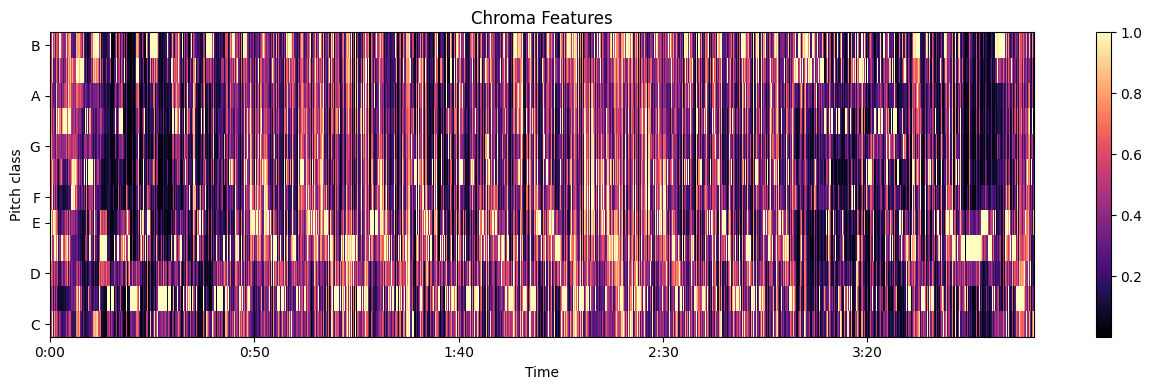

In [7]:
y, sr = librosa.load(new_song_path, sr=None)

chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(13, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()

In [8]:
# To compute the similarity between MSD and MP3 segment pitches features
def compute_similarity(features1, features2):
    similarity = 1 - cosine(features1['segments_pitches'], features2['segments_pitches'])
    return similarity

In [9]:
# To recommend songs from the dataset based on the similarity to the new song
def recommend_songs(new_song_features, df, top_n=5):
    similarities = []
    for idx, row in df.iterrows():
        features = {
            'segments_pitches': np.array(row['segments_pitches'])
        }
        similarity = compute_similarity(new_song_features, features)
        similarities.append((row['song_id'], similarity, row['artist_name'], row['song_title'], row['album_name']))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

In [10]:
# get recommendations for songs which are similar
recommendations = recommend_songs(new_song_features, df)
for rec in recommendations:
    print(f"Song ID: {rec[0]}, Similarity: {rec[1]:.4f}, Artist: {rec[2]}, Title: {rec[3]}, Album: {rec[4]}")

Song ID: TRBHCVQ12903CF8E90, Similarity: 0.8737, Artist: Joe Lynn Turner, Title: Two Lights [Bonus Track], Album: Second Hand Life: The Deluxe Edition
Song ID: TRAOHAH128F425CD57, Similarity: 0.8675, Artist: Mars Ill, Title: Saturday Night Special, Album: Pro*Pain
Song ID: TRAZRXP12903CBD6A9, Similarity: 0.8599, Artist: Vonray, Title: Part Of Me (LP Version), Album: Vonray
Song ID: TRARWYL128F423B96A, Similarity: 0.8482, Artist: Singing Melody, Title: Lived My Life, Album: Expression
Song ID: TRAECSU128F426A84A, Similarity: 0.8458, Artist: Headhunter, Title: Signs Of Insanity, Album: A Bizarre Gardening Accident
